<a href="https://colab.research.google.com/github/saivishwanathgoud/Regression/blob/master/Regression(Pycaret).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pycaret

In [0]:
import pandas as pd 
from pycaret.regression import *

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [4]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
#dropping the unnamed column
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
data = df.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (48546, 10)
Unseen Data For Predictions (5394, 10)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


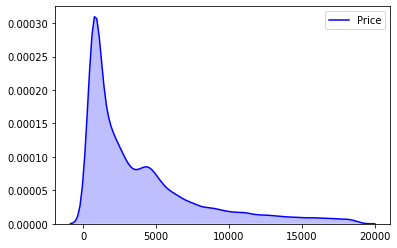

In [7]:
import seaborn as sns
ax = sns.kdeplot(data['price'], color='b', shade=True, Label= 'Price')

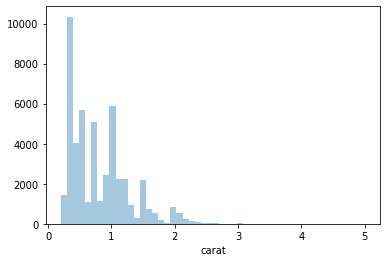

In [9]:

ax = sns.distplot(data['carat'], kde= False, bins = 50)

The target variable Price is not normally distributed. It is right skewed with high kurtosis. We will normalize the price in our model setup

from the Regression[Scikit-learn](https://colab.research.google.com/drive/1oVOkXD_EGPcOU_taxEnbSMDCwmZt6ydn)

a) We see data has few missing values, in Pycaret missing values are imputed with mean by default for numerical values and constant for categorical values. 

b) Notice the distribution of the Clarity feature in the dataset. It has 7 distinct classes of which l1 and F1 are low in count. Similarly in the Cut feature, the Fair level appears less time than other categories in the training dataset. We will use the combine_rare_categories parameter in the setup to combine the rare levels

c) looking at the carat feature, the distrubution seems to have natural breaks. so we will bin this feature to avoid noise. Binning will convert it into a categorical feature. 

d) The features x, y and z are highly corelated with each other. we can treat this using pycaret's remove multicollinearity in model setup. 


In [10]:
reg = setup(data = data, target = 'price', session_id=123,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.90, 
                  bin_numeric_features = ['carat']) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(48546, 10)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
#create model 

lr = create_model('lr', fold = 5, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,385.07,513653.86,716.70,0.97,0.12,0.10
1,398.21,520841.00,721.69,0.97,0.13,0.10
2,404.17,592848.54,769.97,0.96,0.13,0.10
3,380.86,551789.90,742.83,0.96,0.14,0.09
4,397.35,583412.70,763.81,0.96,0.14,0.10
Mean,393.13,552509.20,743.00,0.97,0.13,0.10
SD,8.73,31923.09,21.48,0.00,0.01,0.00


In [12]:
#storing the trained model is stored in the variable lr
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [13]:
#model tuning 
tuned_lr = tune_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,381.7698,513184.6054,716.3690,0.9679,0.1218,0.0977
1,384.2710,507785.0596,712.5904,0.9682,0.1248,0.0966
2,393.9473,507977.8970,712.7257,0.9663,0.1238,0.0990
3,398.2567,524902.8794,724.5018,0.9682,0.1262,0.1000
4,403.8730,564343.6482,751.2281,0.9653,0.1232,0.0978
5,399.3325,610754.7627,781.5080,0.9605,0.1264,0.1004
6,386.9189,516057.2433,718.3712,0.9674,0.1212,0.0945
7,383.0248,602495.3318,776.2057,0.9607,0.1579,0.0971
8,407.9928,570471.1756,755.2954,0.9654,0.1284,0.1017
9,395.6998,610543.6089,781.3729,0.9618,0.1564,0.0942


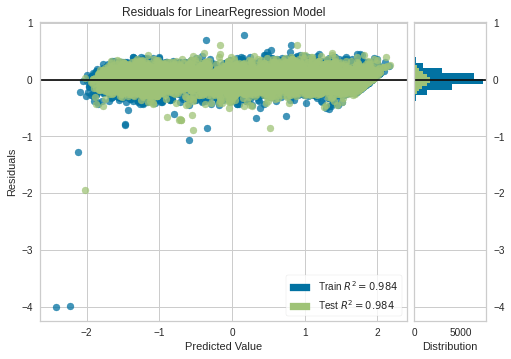

In [14]:
#Plotting the model 

plot_model(tuned_lr)

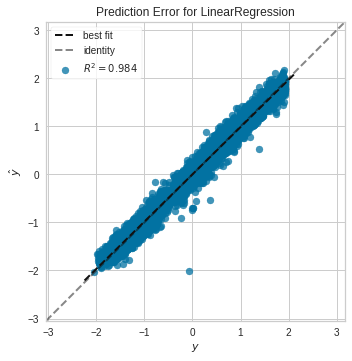

In [15]:

plot_model(tuned_lr, plot = 'error')


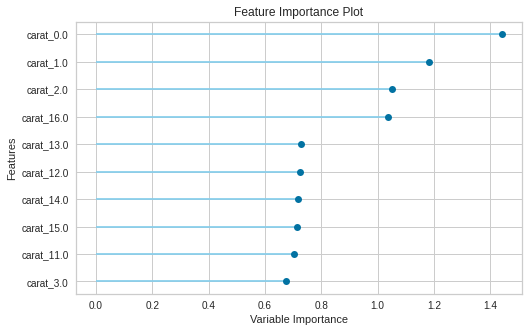

In [16]:
plot_model(tuned_lr, plot='feature')


In [17]:
predict_model(tuned_lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,393.499,559662.8498,748.1062,0.9644,0.1261,0.0978


In [18]:
#finalize model for deployment 
final_lr = finalize_model(tuned_lr)

In [19]:
#Final Linear Regression Model for deployment
print(final_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [20]:
predict_model(final_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,395.8595,566218.5462,752.4749,0.964,0.1268,0.0985


,depth,table,x,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat_0.0,carat_1.0,carat_10.0,carat_11.0,carat_12.0,carat_13.0,carat_14.0,carat_15.0,carat_16.0,carat_2.0,carat_3.0,carat_4.0,carat_5.0,carat_6.0,carat_7.0,carat_8.0,carat_9.0,0,Label
0,0.732560,-0.096986,0.668511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3926.0,3482.0164
1,1.161270,0.361988,-1.486552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,421.0,456.7142
2,-0.528460,1.480271,0.580880,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3544.0,3515.3911
3,0.166632,-1.190477,0.194092,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3462.0,3892.2405
4,1.304837,-0.096986,-1.370927,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,558.0,478.4330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,1.161270,0.767153,-2.046685,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,407.5667
10191,1.233015,1.803970,0.400379,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4081.0,4833.2768
10192,-0.321359,0.767153,-0.435645,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1443.0,1489.9133
10193,1.520740,-1.190477,0.425438,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4279.0,4309.5735


In [21]:
#Predict the model on Unseen data 
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Label
0,0.61,Very Good,F,VS2,61.8,56.0,1989,5.42,5.46,3.36,1823.7318
1,0.72,Very Good,J,SI1,63.0,58.0,1989,5.67,5.70,3.58,1632.1697
2,0.74,Good,H,VS2,59.2,64.0,1989,5.79,5.66,3.40,2285.0835
3,0.65,Ideal,E,SI1,62.7,54.0,1989,5.58,5.56,3.49,2542.8939
4,0.54,Premium,F,VS2,62.0,59.0,1989,5.22,5.16,3.22,1728.7167


In [22]:
#Saving the model 

save_model(final_lr,'Final Linear Regression Model 04June2020')


Transformation Pipeline and Model Succesfully Saved


for more information please refer to [Pycaret](https://pycaret.org/) website